In [274]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [275]:
df = pd.read_csv('C:/Users/My Lappie/Downloads/Datasets (2)/Breast Cancer Prediction/Dataset/cancer.csv')

In [276]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [277]:
df.isna().sum().sort_values(ascending=False).head()

Unnamed: 32     569
area_se           0
diagnosis         0
radius_mean       0
texture_mean      0
dtype: int64

In [278]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [279]:
df.shape

(569, 33)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [281]:
df.replace('0', np.nan, inplace = True)

In [282]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 32                569
area_se                      0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
smoothness_se                0
fractal_dimension_worst      0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
id      

In [283]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [284]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [285]:
df.isna().sum().sort_values(ascending=False)

fractal_dimension_worst    0
symmetry_worst             0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
id                         0
dtype: int64

In [286]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [287]:
y = df['diagnosis']
x = df.drop(['diagnosis'], axis=1)

In [288]:
print(y.shape)
print(x.shape)

(569,)
(569, 31)


### **Standardizing** 

In [289]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() 
x_sc = scale.fit_transform(x)

x_sc = pd.DataFrame(x_sc)

In [290]:
x_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### **Train Test Split**

In [291]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.3, random_state=100)

In [292]:
print('x_train shape', x_train.shape)
print('x_test shape',  x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape',  y_test.shape)

x_train shape (398, 31)
x_test shape (171, 31)
y_train shape (398,)
y_test shape (171,)


## **Logistic Regression**

In [293]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr2 = LogisticRegression(max_iter=1000)

In [294]:
lr.fit(x_train, y_train)
lr2.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [295]:
y_pred1 = lr.predict(x_test)   
y_pred2 = lr2.predict(x_test) 

In [296]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score

In [297]:
print('Confusion Matrix For lr: ', confusion_matrix(y_test, y_pred1))
print('Confusion Matrix For lr2: ', confusion_matrix(y_test, y_pred2))

Confusion Matrix For lr:  [[102   0]
 [  6  63]]
Confusion Matrix For lr2:  [[102   0]
 [  6  63]]


In [359]:
print('F1 score for lr: ', f1_score(y_test, y_pred1, pos_label = 'M'))
print('Accuracy for lr: ', accuracy_score(y_test, y_pred1))
print('Precision for lr:', precision_score(y_test, y_pred1, pos_label = 'M', average='weighted'))
print('Recall for lr:   ', recall_score(y_test, y_pred1, pos_label = 'M'))

F1 score for lr:  0.9545454545454545
Accuracy for lr:  0.9649122807017544
Precision for lr: 0.9668615984405456
Recall for lr:    0.9130434782608695


In [358]:
print('F1 score for lr2: ', f1_score(y_test, y_pred2, pos_label = 'M'))
print('Accuracy for lr2: ', accuracy_score(y_test, y_pred2))
print('Precision for lr2:', precision_score(y_test, y_pred2, pos_label = 'M', average='weighted'))
print('Recall for lr2:   ', recall_score(y_test, y_pred2, pos_label = 'M'))

F1 score for lr2:  0.9545454545454545
Accuracy for lr2:  0.9649122807017544
Precision for lr2: 0.9668615984405456
Recall for lr2:    0.9130434782608695


In [300]:
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       102
           M       1.00      0.91      0.95        69

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [301]:
report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       102
           M       1.00      0.91      0.95        69

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



## **Decision Tree**

In [302]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [303]:
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [304]:
from sklearn import metrics

In [305]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred, pos_label = 'M'))    # pos_label = 'M'
print('Recall', metrics.recall_score(y_test, y_pred, pos_label = 'M'))

Accuracy 0.935672514619883
Precision 0.9393939393939394
Recall 0.8985507246376812


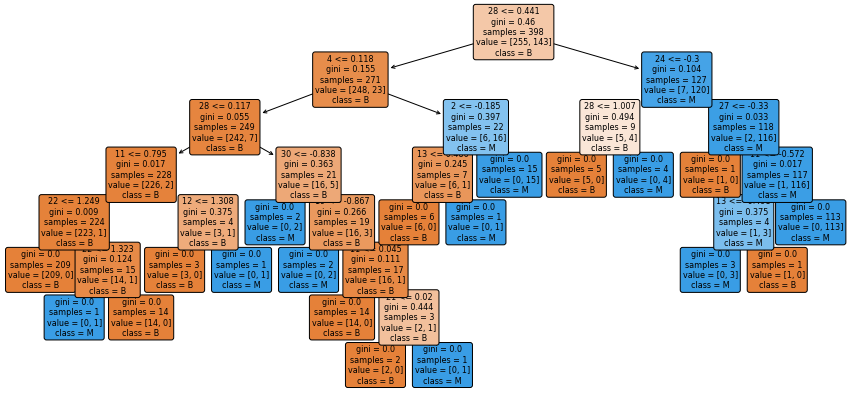

In [306]:
plt.figure(figsize=(15, 7))
tree.plot_tree(dt, 
               filled=True, rounded=True, 
               feature_names = x_train.columns,
               class_names = ['B','M'],
               fontsize=8)
plt.show()

### **HyperParameter Tuning**

In [307]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [308]:
def report(results, n_top=3):
    for i in range (1, n_top+1):
        candidates= np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print('Model with rank: {0}' .format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('Parametres: {0}'.format(results['params'][candidate]))
            print('')

### **Random Search for decision tree**

In [309]:
param_dist = {'max_depth': [3, None],
             'max_features': sp_randint(1,11),
             'min_samples_split': sp_randint(2,11),
             'criterion':['gini', 'entropy']}

In [310]:
n_iter_search = 15
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter= n_iter_search, cv=5)

In [311]:
start = time()
random_search.fit(x_train, y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter settings.' %((time()-start), n_iter_search))
report(random_search.cv_results_)

Randomized search too 0.88 seconds for 15 candidatesparameter settings.
Model with rank: 1
Mean validation score:  0.940 (std: 0.027)
Parametres: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 4}

Model with rank: 2
Mean validation score:  0.932 (std: 0.023)
Parametres: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_split': 2}

Model with rank: 3
Mean validation score:  0.930 (std: 0.020)
Parametres: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 2}



In [312]:
#  Parametres: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 3}

dt_random_search = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 4, min_samples_split= 3)

In [313]:
dt_random_search.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_split=3)

In [314]:
y_pred_rs= dt_random_search.predict(x_test)

In [315]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred_rs))
print('Precision', metrics.precision_score(y_test, y_pred_rs, pos_label = 'M'))
print('Recall', metrics.recall_score(y_test, y_pred_rs, pos_label = 'M'))

Accuracy 0.9298245614035088
Precision 0.9253731343283582
Recall 0.8985507246376812


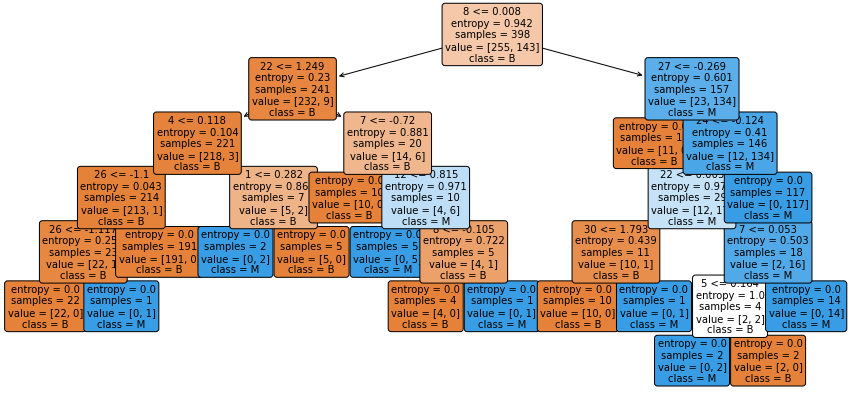

In [316]:
plt.figure(figsize=(15, 7))
tree.plot_tree(dt_random_search, 
               filled=True, rounded=True, 
               feature_names = x_train.columns,
               class_names = ['B','M'],
               fontsize=10)
plt.show()

### **Grid Search for decision tree**

In [317]:
param_grid = {'max_depth': [3, None],
             'max_features': [1,3,10],
             'min_samples_split': [2,3,10],
             'criterion': ['gini', 'entropy']}

In [318]:
grid_search = GridSearchCV(dt, param_grid= param_grid, cv=5)

In [319]:
start = time()
grid_search.fit(x_train, y_train)
print('GridSearchCV took %.2f seconds for %d candidate parameter setting. '
     %(time()-start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 1.77 seconds for 36 candidate parameter setting. 
Model with rank: 1
Mean validation score:  0.947 (std: 0.030)
Parametres: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 3}

Model with rank: 2
Mean validation score:  0.937 (std: 0.018)
Parametres: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_split': 2}

Model with rank: 3
Mean validation score:  0.937 (std: 0.027)
Parametres: {'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}



In [320]:
# Parametres: {'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

dt_grid_search = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 10, min_samples_split= 3)

In [321]:
dt_grid_search.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=10,
                       min_samples_split=3)

In [322]:
y_pred_gs= dt_grid_search.predict(x_test)

In [323]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred_gs))
print('Precision', metrics.precision_score(y_test, y_pred_gs, pos_label = 'M'))
print('Recall', metrics.recall_score(y_test, y_pred_gs, pos_label = 'M'))

Accuracy 0.9532163742690059
Precision 0.9420289855072463
Recall 0.9420289855072463


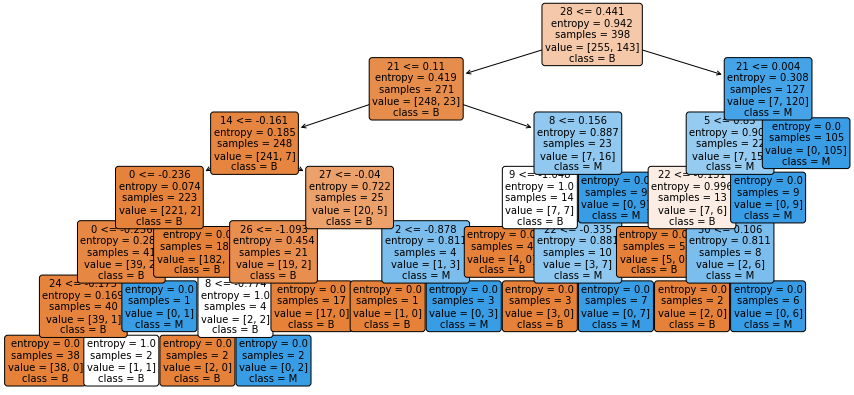

In [324]:
plt.figure(figsize=(15, 7))
tree.plot_tree(dt_grid_search, 
               filled=True, rounded=True, 
               feature_names = x_train.columns,
               class_names = ['B','M'],
               fontsize=10)
plt.show()

## **Random Forest**

In [325]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [326]:
ypred = rf.predict(x_test)

In [327]:
print('Accuracy using RF: ', metrics.accuracy_score(y_test, ypred))
print('Precision using RF:', metrics.precision_score(y_test, ypred, pos_label = 'M'))
print('Recall using RF:   ', metrics.recall_score(y_test, ypred, pos_label = 'M'))

Accuracy using RF:  0.9532163742690059
Precision using RF: 0.9692307692307692
Recall using RF:    0.9130434782608695


In [328]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [329]:
def report(results, n_top=3):
    for i in range (1, n_top+1):
        candidates= np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print('Model with rank: {0}' .format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('Parametres: {0}'.format(results['params'][candidate]))
            print('')

### **Random Search for Random Forest**

In [330]:
param_dist = {'max_depth': [3, None],
             'max_features': sp_randint(1,11),
             'min_samples_split': sp_randint(2,11),
             'bootstrap': [True, False], 
             'criterion':['gini', 'entropy']}

In [331]:
n_iter_search = 15
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter= n_iter_search, cv=5)  #scoring='recall'


In [332]:
start = time()
random_search.fit(x_train, y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter settings.' %((time()-start), n_iter_search))
report(random_search.cv_results_)

Randomized search too 22.42 seconds for 15 candidatesparameter settings.
Model with rank: 1
Mean validation score:  0.960 (std: 0.009)
Parametres: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 3}

Model with rank: 1
Mean validation score:  0.960 (std: 0.009)
Parametres: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 2}

Model with rank: 1
Mean validation score:  0.960 (std: 0.009)
Parametres: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 5}



In [333]:
# Parametres: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 4}

rf_random_search = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= None, 
                                             max_features= 3, min_samples_split= 4)

rf_random_search.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=3,
                       min_samples_split=4)

In [334]:
y_pred_rf_rs= rf_random_search.predict(x_test)

In [335]:
print('Accuracy using Random RF :', metrics.accuracy_score(y_test, y_pred_rf_rs))
print('Precision using Random RF:', metrics.precision_score(y_test, y_pred_rf_rs, pos_label = 'M'))
print('Recall using Random RF:   ', metrics.recall_score(y_test, y_pred_rf_rs, pos_label = 'M'))

Accuracy using Random RF : 0.9532163742690059
Precision using Random RF: 0.9841269841269841
Recall using Random RF:    0.8985507246376812


### **Grid Search for Random Forest**

In [336]:
param_grid = {'max_depth': [3, None],
             'max_features': [1,2,6,None],
             'min_samples_split': [1,2,6,None],
             'bootstrap': [True, False], 
             'criterion':['gini', 'entropy']}

In [337]:
grid_search = GridSearchCV(rf, param_grid= param_grid, cv=5)

In [338]:
import warnings
warnings.filterwarnings('ignore') 

start = time()
grid_search.fit(x_train, y_train)
print('GridSearchCV took %.2f seconds for %d candidate parameter setting. '
     %(time()-start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 142.82 seconds for 128 candidate parameter setting. 
Model with rank: 1
Mean validation score:  0.967 (std: 0.006)
Parametres: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 2}

Model with rank: 2
Mean validation score:  0.965 (std: 0.005)
Parametres: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 2}

Model with rank: 2
Mean validation score:  0.965 (std: 0.005)
Parametres: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 6}



In [339]:
# Parametres: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 6}

rf_grid_search = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= None, 
                                             max_features= 6, min_samples_split= 6)

In [340]:
rf_grid_search.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=6,
                       min_samples_split=6)

In [341]:
y_pred_rf_gs= rf_random_search.predict(x_test)

In [ ]:
print('Accuracy using Random RF Grid Search:', metrics.accuracy_score(y_test, y_pred_rf_gs))
print('Precision using Random RF Grid Search:', metrics.precision_score(y_test, y_pred_rf_gs, pos_label = 'M'))
print('Recall using Random RF Grid Search:   ', metrics.recall_score(y_test, y_pred_rf_gs, pos_label = 'M'))

## **Gradient Boosting Classification**

In [343]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [344]:
gradient_booster =  GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [345]:
gradient_booster.fit(x_train, y_train)
print(classification_report(y_test, gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

           B       0.93      0.98      0.96       102
           M       0.97      0.90      0.93        69

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [346]:
y_pred_gd = gradient_booster.predict(x_test)

In [347]:
print('Accuracy using Gradient Boost :', metrics.accuracy_score(y_test, y_pred_gd ))
print('Precision using Gradient Boost:', metrics.precision_score(y_test, y_pred_gd , pos_label = 'M'))
print('Recall using Gradient Boost   :', metrics.recall_score(y_test, y_pred_gd , pos_label = 'M'))

Accuracy using Gradient Boost : 0.9473684210526315
Precision using Gradient Boost: 0.96875
Recall using Gradient Boost   : 0.8985507246376812


## **AdaBoosting**

In [348]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [349]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [350]:
clf.predict(x_test)

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B'], dtype=object)

In [351]:
clf.score(x_test,y_test)

0.9707602339181286

In [352]:
y_pred_ad = clf.predict(x_test)

In [357]:
print('Accuracy using AdaBoost :', metrics.accuracy_score(y_test, y_pred_ad))
print('Precision using AdaBoost:', metrics.precision_score(y_test, y_pred_ad, pos_label = 'M', average='weighted'))
print('Recall using AdaBoost   :', metrics.recall_score(y_test, y_pred_ad, pos_label = 'M'))

Accuracy using AdaBoost : 0.9707602339181286
Precision using AdaBoost: 0.9721265781275618
Recall using AdaBoost   : 0.927536231884058


### **Conclusion**

In [354]:
print('Accuracy of Decision Tree Baseline Model:', metrics.accuracy_score(y_test, y_pred))
print('Accuracy of Decision Tree Random Search :', metrics.accuracy_score(y_test, y_pred_rs))
print('Accuracy of Decision Tree Grid Search   :', metrics.accuracy_score(y_test, y_pred_gs))

Accuracy of Decision Tree Baseline Model: 0.935672514619883
Accuracy of Decision Tree Random Search : 0.9298245614035088
Accuracy of Decision Tree Grid Search   : 0.9532163742690059


In [355]:
print('Accuracy of Random RF Baseline Model:', metrics.accuracy_score(y_test, y_pred_rf))
print('Accuracy of Random RF Random Search :', metrics.accuracy_score(y_test, y_pred_rf_rs))
print('Accuracy of Random RF Grid Search   :', metrics.accuracy_score(y_test, y_pred_rf_gs))

Accuracy of Random RF Baseline Model: 0.9473684210526315
Accuracy of Random RF Random Search : 0.9532163742690059
Accuracy of Random RF Grid Search   : 0.9532163742690059


In [356]:
print('Accuracy using Grradient Boosting:', gradient_booster.score(x_test,y_test)*100)
print('Accuracy using Adaboost          :', clf.score(x_test,y_test)*100)

Accuracy using Grradient Boosting: 94.73684210526315
Accuracy using Adaboost          : 97.07602339181285
